In [12]:
pip install matplotlib

183.12s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 3.2 MB/s eta 0:00:000:00:010:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 3.4 MB/s eta 0:00:00 MB/s eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 3.1 MB/s eta 0:00:00 MB/s eta 0:00:01:01
Note: you may need to restart the kernel to use updated packages.


In [35]:
pip install seaborn

4899.46s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Note: you may need to restart the kernel to use updated packages.


In [36]:
pip install --upgrade matplotlib

4905.71s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Note: you may need to restart the kernel to use updated packages.


In [21]:
pip install scikit-learn

1177.23s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 3.9 MB/s eta 0:00:003.9 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.1/23.1 MB 5.5 MB/s eta 0:00:00m eta 0:00:010:01:01
Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install pandas

170.16s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Note: you may need to restart the kernel to use updated packages.


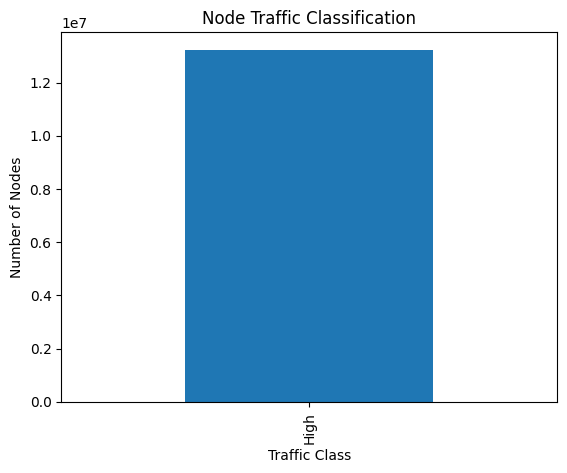

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("raw/data.csv", names=["SourceIP", "DestinationIP", "Packets", "StartTime"])


def classify_traffic(packets): 
    if packets <= 100:
        return "Low" # classification thresholds low
    elif 101 <= packets <= 1000:
        return "Medium"
    else:
        return "High"

# Apply classification
data["TrafficClass"] = data["Packets"].apply(classify_traffic)
data.to_csv("output/classified_data.csv", index=False)

# Plot classification distribution
traffic_counts = data["TrafficClass"].value_counts()
traffic_counts.plot(kind="bar")
plt.title(" ---- Node Traffic Classification --- ")
plt.xlabel(" Class based on Traffic")
plt.ylabel("No. of Nodes")
plt.show()



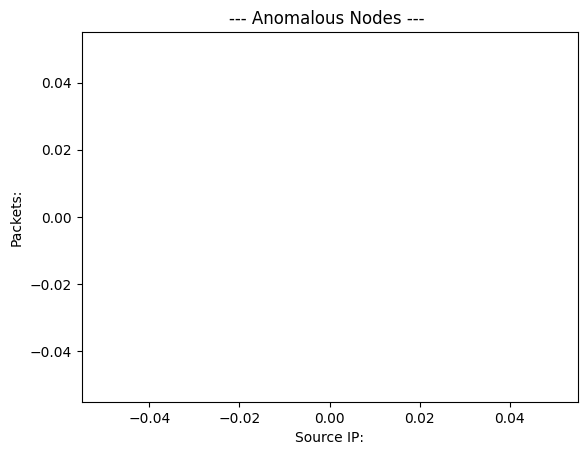

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv("raw/data.csv", names=["SourceIP", "DestinationIP", "Packets", "StartTime"])


anomalies = data[data["Packets"] > 1000] # Detect anomalies
anomalies.to_csv("output/anomalies.csv", index=False)

# Plot anomalies
plt.scatter(anomalies["SourceIP"], anomalies["Packets"], color="orange")
plt.title("--- Anomalous Nodes --- ")
plt.xlabel("Source IP:")
plt.ylabel("Packets:")
plt.show()



# Network Traffic Classification and Anomaly Detection
two approaches:
1. Very Fast Decision Trees (VFDT)
2. On-Demand Classification



# 1. Import Required Libraries

In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better visualizations
plt.style.use('seaborn-darkgrid')  # Use a specific seaborn style
sns.set_palette('husl')  # Set seaborn's color palette

OSError: 'seaborn-darkgrid' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

## 2. Define the NetworkTrafficAnalyzer Class

In [53]:
class NetworkTrafficAnalyzer:
    def __init__(self, data_path):
        """Initialize the analyzer with data path and classification parameters."""
        self.data = pd.read_csv(data_path, names=["SourceIP", "DestinationIP", "Packets", "StartTime"])
        self.le = LabelEncoder()
        self.anomaly_threshold = 1000  # Packets per second threshold for anomaly
        self.class_ranges = [
            (0, 10, 'Very Low'),
            (10, 100, 'Low'),
            (100, 500, 'Medium'),
            (500, 1000, 'High'),
            (1000, float('inf'), 'Very High')
        ]
        
    def preprocess_data(self):
        """Preprocess the data for classification."""
        # Add traffic class labels based on packet counts
        self.data['TrafficClass'] = pd.cut(
            self.data['Packets'],
            bins=[r[0] for r in self.class_ranges] + [float('inf')],
            labels=[r[2] for r in self.class_ranges],
            right=False
        )
        
        # Encode IP addresses
        self.data['SourceIP_encoded'] = self.le.fit_transform(self.data['SourceIP'])
        return self.data
    
    def vfdt_classification(self):
        """Very Fast Decision Tree (implemented using sklearn's DecisionTree for demonstration)"""
        X = self.data[['SourceIP_encoded', 'Packets']]
        y = self.data['TrafficClass']
        
        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        # Train VFDT (using DecisionTree as proxy)
        vfdt = DecisionTreeClassifier(max_depth=5)
        vfdt.fit(X_train, y_train)
        
        # Make predictions
        y_pred = vfdt.predict(X_test)
        
        return {
            'accuracy': accuracy_score(y_test, y_pred),
            'classification_report': classification_report(y_test, y_pred),
            'test_data': X_test,
            'predictions': y_pred
        }
    
    def on_demand_classification(self, query_ranges):
        """On-demand classification for specific packet ranges."""
        results = {}
        for range_min, range_max in query_ranges:
            range_data = self.data[
                (self.data['Packets'] >= range_min) & 
                (self.data['Packets'] < range_max)
            ]
            results[(range_min, range_max)] = {
                'count': len(range_data),
                'avg_packets': range_data['Packets'].mean(),
                'samples': range_data.head()
            }
        return results
    
    def detect_anomalies(self):
        """Detect anomalous nodes based on packet threshold."""
        anomalies = self.data[self.data['Packets'] > self.anomaly_threshold]
        return anomalies
    
    def visualize_results(self):
        """Create visualizations for the analysis results."""
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
        
        # Traffic distribution plot
        sns.histplot(data=self.data, x='Packets', bins=50, ax=ax1)
        ax1.set_title('Traffic Distribution')
        ax1.set_xlabel('Packets per Second')
        ax1.set_ylabel('Frequency')
        
        # Anomalies scatter plot
        anomalies = self.detect_anomalies()
        ax2.scatter(self.data['SourceIP_encoded'], self.data['Packets'], 
                   alpha=0.5, color='blue', label='Normal')
        ax2.scatter(anomalies['SourceIP_encoded'], anomalies['Packets'], 
                   color='red', label='Anomalous')
        ax2.set_title('Anomaly Detection')
        ax2.set_xlabel('Source IP (encoded)')
        ax2.set_ylabel('Packets per Second')
        ax2.legend()
        
        plt.tight_layout()
        plt.show()

## 3. Load and Preprocess Data

Let's load our network traffic data and prepare it for analysis.

In [54]:
# Initialize analyzer
analyzer = NetworkTrafficAnalyzer("raw/data.csv")

# Preprocess data
processed_data = analyzer.preprocess_data()

# Display first few rows of processed data
print("Processed Data Sample:")
display(processed_data.head())

# Display basic statistics
print("\nBasic Statistics:")
display(processed_data['Packets'].describe())

Processed Data Sample:


,SourceIP,DestinationIP,Packets,StartTime,TrafficClass,SourceIP_encoded
0,10.0.40.53|192.168.121.145| 9|201...,NaN,NaN,NaN,NaN,2963441
1,10.0.40.53| 192.168.121.77| 9|201...,NaN,NaN,NaN,NaN,2713661
2,10.0.40.53| 192.168.121.57| 9|201...,NaN,NaN,NaN,NaN,2702798
3,10.0.40.53|192.168.121.244| 9|201...,NaN,NaN,NaN,NaN,2984341
4,10.0.40.20| 192.168.121.57| 13|201...,NaN,NaN,NaN,NaN,246022



Basic Statistics:


count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Packets, dtype: float64

## 4. VFDT Classification

Now let's perform classification using the Very Fast Decision Tree approach.

In [44]:
# Perform VFDT classification
vfdt_results = analyzer.vfdt_classification()

print("VFDT Classification Results:")
print(f"Accuracy: {vfdt_results['accuracy']:.2f}")
print("\nClassification Report:")
print(vfdt_results['classification_report'])

ValueError: Input contains NaN

## 5. On-Demand Classification

Let's analyze specific traffic ranges using on-demand classification.

In [ ]:
# Define query ranges
query_ranges = [(10, 100), (500, 1000)]

# Perform on-demand classification
od_results = analyzer.on_demand_classification(query_ranges)

print("On-Demand Classification Results:")
for range_tuple, results in od_results.items():
    print(f"\nRange {range_tuple}:")
    print(f"Number of nodes: {results['count']}")
    print(f"Average packets: {results['avg_packets']:.2f}")
    print("\nSample nodes in this range:")
    display(results['samples'])

## 6. Anomaly Detection

Let's identify and analyze anomalous nodes in our network.

In [ ]:
# Detect anomalies
anomalies = analyzer.detect_anomalies()

print(f"Detected {len(anomalies)} anomalous nodes")
print("\nSample of anomalous nodes:")
display(anomalies.head())

# Calculate percentage of anomalous nodes
anomaly_percentage = (len(anomalies) / len(processed_data)) * 100
print(f"\nPercentage of anomalous nodes: {anomaly_percentage:.2f}%")

## 7. Visualization

Finally, let's visualize our results to better understand the traffic patterns and anomalies.

/var/folders/7p/lgqmtnt51dq5x6x0fjxmzfww0000gn/T/ipykernel_69159/883908115.py:92: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/opt/homebrew/Cellar/jupyterlab/4.3.4/libexec/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


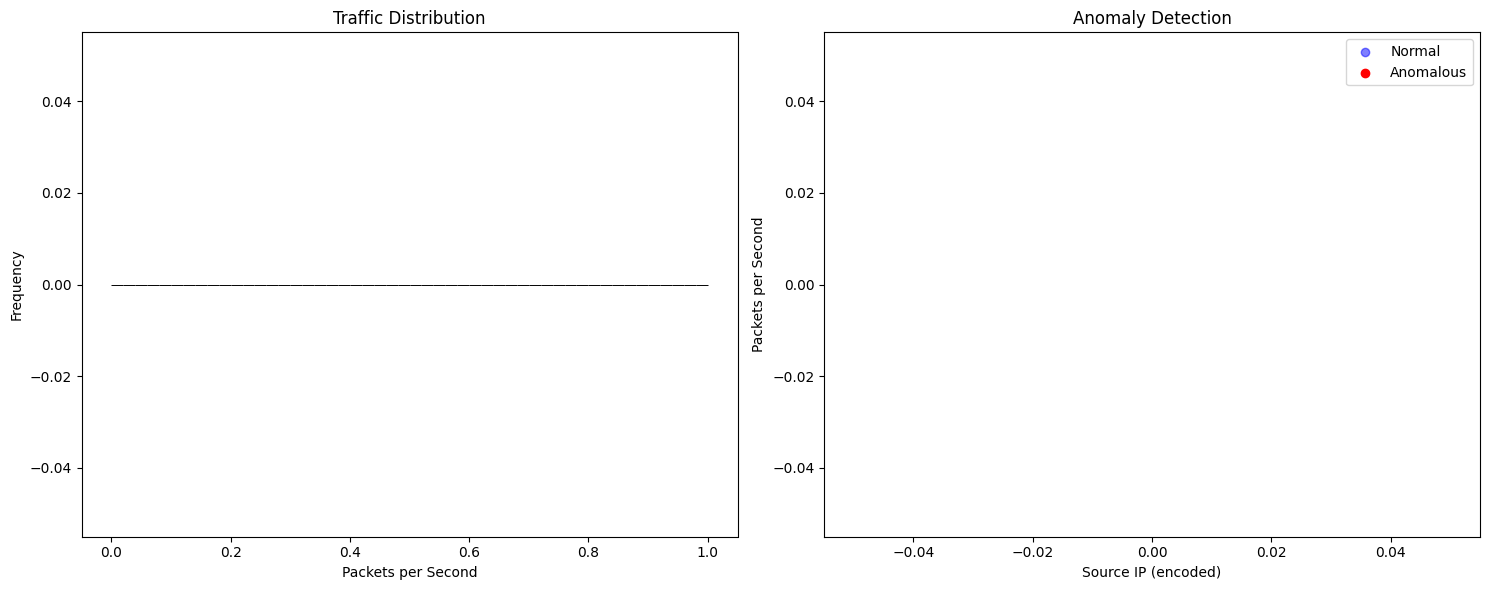

In [45]:
# Create visualizations
analyzer.visualize_results()